# Figures
1. Network diagram (in python?)
2. Wythoff game play demo (in python?)
3. Optimal score main effect (2 panels). 
     - a. stumbler and strategist
     - b. strategist and perfect strategist    
4. Control exp for heuristics and param sensitivity (optimal score)
     - a. H,C,and HC 
     - b. TODO: add noise to hyper; noise_fn needed
5. Optimal score during transfer to larger board (1 panel), 50 -> 500. 
     - a. stumbler and strategist  
6. Total reward during transfer to new rules (2 panels). Nim and Euclid.
    - a. Naive nim and Nim w/ bias_board
    - b. Naive euclid and Euclid w/ bias_board

In [ ]:
import os
import csv
import numpy as np

from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

import seaborn as sns
sns.set_style('ticks')

# Load data 

- All figues

In [2]:
path = "/Users/type/Code/azad/data/wythoff/exp13/"
results_path = "/Users/type/Code/azad/data/wythoff/"

files = sorted(glob(os.path.join(path, "run_*_monitor.csv")))
files[:10]

exp_13 = []
for fi in files:
    mon = load_monitored(fi)
    exp_13.append(mon)

In [31]:
path = "/Users/type/Code/azad/data/wythoff/exp14/"

exp_14 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*.csv".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_14.append(mon)

In [32]:
path = "/Users/type/Code/azad/data/wythoff/exp15/"

exp_15 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_15.append(mon)

In [33]:
path = "/Users/type/Code/azad/data/wythoff/exp16/"

exp_16 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_16.append(mon)

In [34]:
path = "/Users/type/Code/azad/data/wythoff/exp17/"

exp_17 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_17.append(mon)

In [4]:
path = "/Users/type/Code/azad/data/wythoff/exp18/"

exp_18 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*.csv".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_18.append(mon)

In [58]:
episode_13, exp_13_avg, exp_13_sem = score_summary(exp_13)
episode_14, exp_14_avg, exp_14_sem = score_summary(exp_14)
episode_15, exp_15_avg, exp_15_sem = score_summary(exp_15)
episode_16, exp_16_avg, exp_16_sem = score_summary(exp_16)
episode_18, exp_18_avg, exp_18_sem = score_summary(exp_18)

# Figures

## Fig 3. 

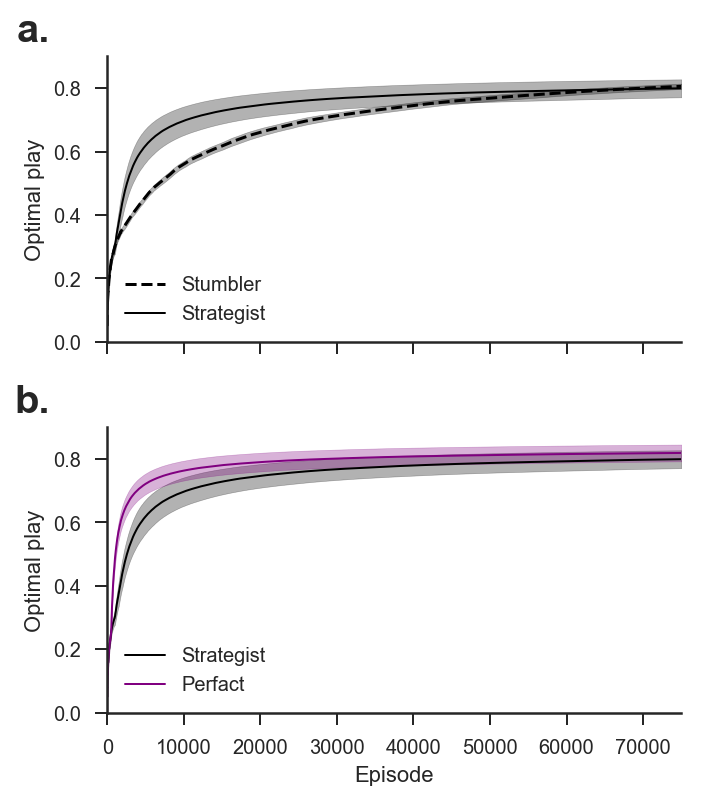

In [47]:
# plt.figure()
fig, ax = plt.subplots(2, sharex=True, figsize=(5, 5.5))

# A
_ = ax[0].plot(episode_13, exp_13_avg, linestyle="--", color='black', alpha=1, linewidth=1.5, label="Stumbler")
_ = ax[0].fill_between(episode_13, 
                       exp_13_avg + 2*exp_13_sem, 
                       exp_13_avg - 2*exp_13_sem,
                       color='black', alpha=0.3)

_ = ax[0].plot(episode_14, exp_14_avg, color='black', alpha=1, linewidth=1, label="Strategist")
_ = ax[0].fill_between(episode_14, 
                       exp_14_avg + 2*exp_14_sem, 
                       exp_14_avg - 2*exp_14_sem,
                       color='black', alpha=0.3)
_ = ax[0].legend()
_ = ax[0].set_ylabel("Optimal play")
_ = ax[0].set_ylim(0, 0.9)
_ = ax[0].set_xlim(0, 75000)
_ = ax[0].text(-0.1, 1.15, "a.", transform=ax[0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# B
_ = ax[1].plot(episode_14, exp_14_avg, color='black', alpha=1, linewidth=1, label="Strategist")
_ = ax[1].fill_between(episode_14, 
                       exp_14_avg + 2*exp_14_sem, 
                       exp_14_avg - 2*exp_14_sem,
                       color='black', alpha=0.3)
_ = ax[1].plot(episode_18, exp_18_avg, color='purple', alpha=1, linewidth=1, label="Perfact")
_ = ax[1].fill_between(episode_18, 
                       exp_18_avg + 2*exp_18_sem, 
                       exp_18_avg - 2*exp_18_sem,
                       color='purple', alpha=0.3)
_ = ax[1].legend()
_ = ax[1].set_xlabel("Episode")
_ = ax[1].set_ylabel("Optimal play")
_ = ax[1].set_ylim(0, 0.9)
_ = ax[1].set_xlim(0, 75000)
_ = ax[1].text(-0.1, 1.15, "b.", transform=ax[1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# Tweaks
_ = fig.tight_layout()
_ = sns.despine()
_ = fig.subplots_adjust(hspace=.3)

## Fig 4.

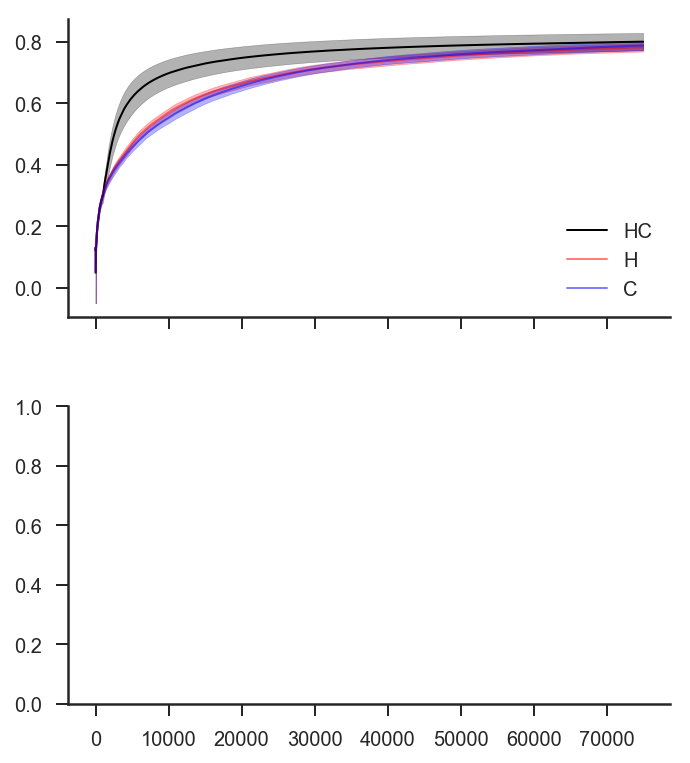

In [57]:
fig, ax = plt.subplots(2, sharex=True, figsize=(5, 5.5))

# H / C 
_ = ax[0].plot(episode_14, exp_14_avg, color='black', alpha=1, linewidth=1, label="HC")
_ = ax[0].fill_between(episode_14, 
                       exp_14_avg + 2*exp_14_sem, 
                       exp_14_avg - 2*exp_14_sem,
                       color='black', alpha=0.3)

_ = ax[0].plot(episode_15, exp_15_avg, color='red', alpha=.5, linewidth=1, label="H")
_ = ax[0].fill_between(episode_15, 
                       exp_15_avg + 2*exp_15_sem, 
                       exp_15_avg - 2*exp_15_sem,
                       color='red', alpha=0.3)

_ = ax[0].plot(episode_16, exp_16_avg, color='blue', alpha=.5, linewidth=1, label="C")
_ = ax[0].fill_between(episode_16, 
                       exp_16_avg + 2*exp_16_sem, 
                       exp_16_avg - 2*exp_16_sem,
                       color='blue', alpha=0.3)

_ = ax[0].legend()

# Parameter sensitvity


# Tweaks
_ = fig.tight_layout()
_ = sns.despine()
_ = fig.subplots_adjust(hspace=.3)